### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0
!pip install -r requirements.txt



Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install pandas-datareader


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\susha\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
### Data Collection
import pandas_datareader as pdr
import pandas_datareader as data
from datetime import date

In [5]:
pip install yfinance


     -------------------------------------- 948.2/948.2 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -------------------------------------- 102.2/102.2 kB 453.2 kB/s eta 0:00:00
   -------------------------------------- 112.2/112.2 kB 815.5 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=95b8cb020ce5b487f5a10d041ee479c945784b2b29bd76430c4bf1ae30b72b76
  Stored in directory: c:\users\susha\appdata\local\pip\cache\wheels\ff\6c\15\506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\susha\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
import yfinance as yf
from datetime import date

start = '2015-01-01'
end = date.today().strftime('%Y-%m-%d')

# Fetching the data using yfinance
df = yf.download('^GSPC', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [8]:
import pandas as pd

In [9]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000


In [10]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2024-11-22,5969.339844,5969.339844,5972.899902,5944.359863,5944.359863,4141420000
2024-11-25,5987.370117,5987.370117,6020.750000,5963.910156,5992.279785,5633150000
2024-11-26,6021.629883,6021.629883,6025.419922,5992.270020,6000.029785,3835170000
2024-11-27,5998.740234,5998.740234,6020.160156,5984.870117,6014.109863,3363340000
2024-11-29,6032.379883,6032.379883,6044.169922,6003.979980,6003.979980,1444343000


In [11]:
df1=df.reset_index()['Close']

In [12]:
df1

Ticker,^GSPC
0,2058.199951
1,2020.579956
2,2002.609985
3,2025.900024
4,2062.139893
...,...
2490,5969.339844
2491,5987.370117
2492,6021.629883
2493,5998.740234


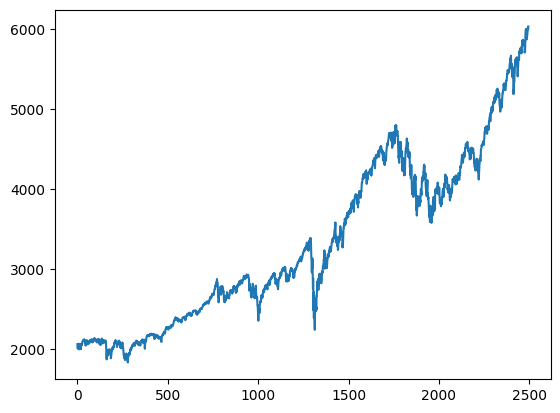

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...,...
2024-11-22,5969.339844,5969.339844,5972.899902,5944.359863,5944.359863,4141420000
2024-11-25,5987.370117,5987.370117,6020.750000,5963.910156,5992.279785,5633150000


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,^GSPC
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2024-11-22,5660.424600
2024-11-25,5664.626401
2024-11-26,5669.114199


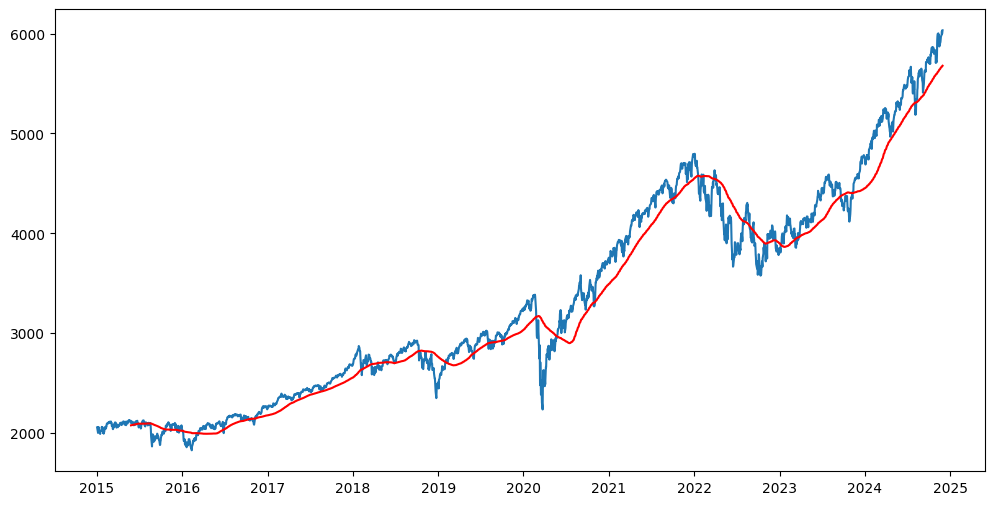

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,^GSPC
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2024-11-22,5434.984592
2024-11-25,5439.788394
2024-11-26,5444.787344


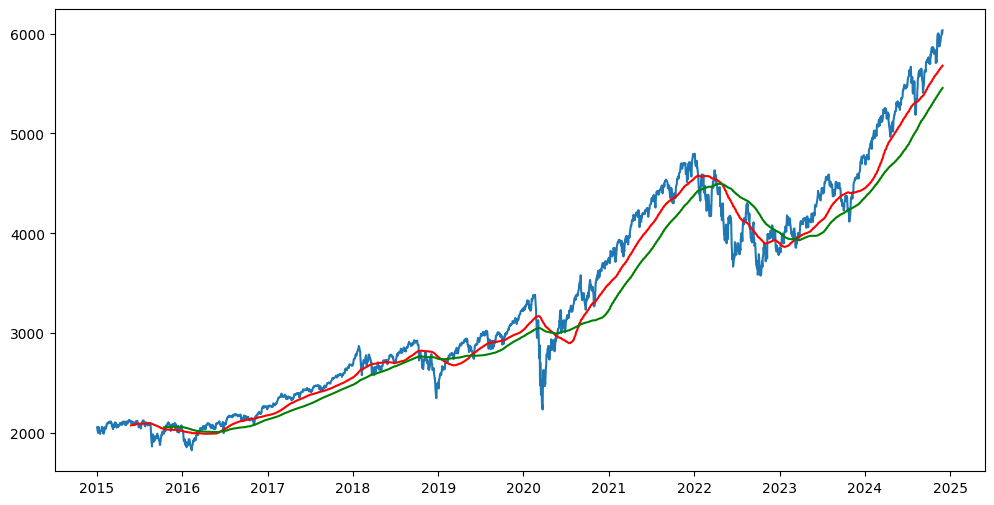

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(2495, 6)

In [20]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [21]:
import numpy as np

In [22]:
df1

Ticker,^GSPC
0,2058.199951
1,2020.579956
2,2002.609985
3,2025.900024
4,2062.139893
...,...
2490,5969.339844
2491,5987.370117
2492,6021.629883
2493,5998.740234


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.05450955]
 [0.04555944]
 [0.04128424]
 ...
 [0.99744249]
 [0.99199685]
 [1.        ]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(1621, 874)

In [27]:
train_data

array([[0.05450955],
       [0.04555944],
       [0.04128424],
       ...,
       [0.57054692],
       [0.56871265],
       [0.57338288]])

In [28]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(1520, 100)
(1520,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(773, 100)
(773,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\susha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0172 - val_loss: 0.0029
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 4.8568e-04 - val_loss: 0.0020
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 4.7764e-04 - val_loss: 0.0014
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - loss: 4.0932e-04 - val_loss: 0.0013
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 4.7294e-04 - val_loss: 0.0012
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 3.7363e-04 - val_loss: 0.0011
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 4.0230e-04 - val_loss: 0.0011
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 3.7832e-04 - val_loss: 0.0010
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 2.8809e-04 - val_loss: 0.0014
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 3.8604e-04 - val_loss: 8.4956e-04
Ep

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.4289e-04 - val_loss: 6.3844e-04
Epoch 65/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 1.1610e-04 - val_loss: 3.6562e-04
Epoch 66/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 1.0844e-04 - val_loss: 5.7834e-04
Epoch 67/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 9.0065e-05 - val_loss: 2.2548e-04
Epoch 68/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 1.0308e-04 - val_loss: 4.7555e-04
Epoch 69/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 1.1082e-04 - val_loss: 2.6655e-04
Epoch 70/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 9.4972e-05 - val_loss: 6.1474e-04
Epoch 71/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 1.1512e-04 - val_loss: 7.2341e-04
Epoch 72/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 9.8916e-05 - val_loss: 1.8576e-04
Epoch 73/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 1.0104e-04 - val_loss: 2.8488e-04
Epoch 74/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step

In [38]:
model.save('keras_model.h5')

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.16.1'

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2789.795353429276

In [44]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4659.820200900807

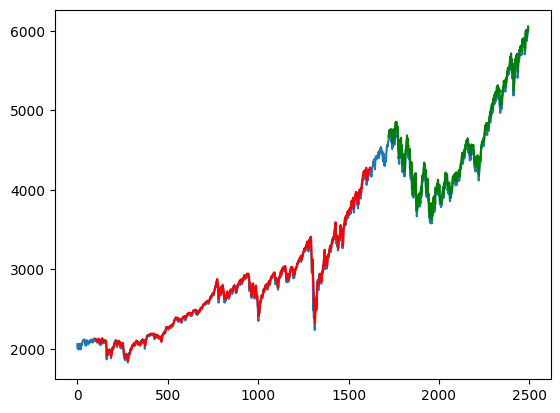

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,'r')
plt.plot(testPredictPlot,'g')
plt.show()

In [46]:
len(test_data)

874

In [47]:
x_input=test_data[553:].reshape(1,-1)
x_input.shape


(1, 321)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.6202102764484738,
 0.6060072197854915,
 0.6130017009921724,
 0.6195679936996117,
 0.6348702146544609,
 0.6389718097524577,
 0.6372565000997723,
 0.6391859040020784,
 0.6346799344695024,
 0.6272214855835025,
 0.6238099175298613,
 0.6253206585587907,
 0.6324507056847919,
 0.6263697552317831,
 0.6276877765862032,
 0.636647440875268,
 0.6236147583658012,
 0.6243784347613552,
 0.6220993706901081,
 0.6121666985688008,
 0.5949896718111145,
 0.5926248771070837,
 0.5967596957294383,
 0.5815549381904499,
 0.5817880836918004,
 0.5877810963548131,
 0.5850093715604832,
 0.5850903393803342,
 0.5710680372764458,
 0.5792282459898785,
 0.5779054618225259,
 0.5898746430540343,
 0.5963362700431294,
 0.6017082583662221,
 0.6061595136331599,
 0.599655021327673,
 0.5944614642402923,
 0.6053695836833928,
 0.6052673574545995,
 0.591325907004393,
 0.5826184394684084,
 0.5698094930005964,
 0.5681155579230222,
 0.5754051011991748,
 0.5609140686030347,
 0.5491280814201709,
 0.5444032548250417,
 0.5561677512666

In [63]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=320
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.60600722 0.6130017  0.61956799 0.63487021 0.63897181 0.6372565
 0.6391859  0.63467993 0.62722149 0.62380992 0.62532066 0.63245071
 0.62636976 0.62768778 0.63664744 0.62361476 0.62437843 0.62209937
 0.6121667  0.59498967 0.59262488 0.5967597  0.58155494 0.58178808
 0.5877811  0.58500937 0.58509034 0.57106804 0.57922825 0.57790546
 0.58987464 0.59633627 0.60170826 0.60615951 0.59965502 0.59446146
 0.60536958 0.60526736 0.59132591 0.58261844 0.56980949 0.56811556
 0.5754051  0.56091407 0.54912808 0.54440325 0.55616775 0.56258651
 0.57306877 0.59208238 0.60173196 0.60354961 0.60649965 0.60754642
 0.5991174  0.61526903 0.61439105 0.63441113 0.63611923 0.63739451
 0.63876956 0.64670615 0.64451979 0.64890448 0.64955153 0.64743184
 0.64849291 0.64746751 0.65156422 0.65794732 0.65203528 0.65141681
 0.64717244 0.65579662 0.6602646  0.66456357 0.66962156 0.68470248
 0.68766681 0.68758119 0.69266532 0.69928157 0.68262322 0.69413796
 0.69601265 0.70079939 0.70242433 0.70284543 0.6996

2 day output [[1.0211014]]
3 day input [0.63487021 0.63897181 0.6372565  0.6391859  0.63467993 0.62722149
 0.62380992 0.62532066 0.63245071 0.62636976 0.62768778 0.63664744
 0.62361476 0.62437843 0.62209937 0.6121667  0.59498967 0.59262488
 0.5967597  0.58155494 0.58178808 0.5877811  0.58500937 0.58509034
 0.57106804 0.57922825 0.57790546 0.58987464 0.59633627 0.60170826
 0.60615951 0.59965502 0.59446146 0.60536958 0.60526736 0.59132591
 0.58261844 0.56980949 0.56811556 0.5754051  0.56091407 0.54912808
 0.54440325 0.55616775 0.56258651 0.57306877 0.59208238 0.60173196
 0.60354961 0.60649965 0.60754642 0.5991174  0.61526903 0.61439105
 0.63441113 0.63611923 0.63739451 0.63876956 0.64670615 0.64451979
 0.64890448 0.64955153 0.64743184 0.64849291 0.64746751 0.65156422
 0.65794732 0.65203528 0.65141681 0.64717244 0.65579662 0.6602646
 0.66456357 0.66962156 0.68470248 0.68766681 0.68758119 0.69266532
 0.69928157 0.68262322 0.69413796 0.69601265 0.70079939 0.70242433
 0.70284543 0.6996289  0

5 day output [[1.0347693]]
6 day input [0.6391859  0.63467993 0.62722149 0.62380992 0.62532066 0.63245071
 0.62636976 0.62768778 0.63664744 0.62361476 0.62437843 0.62209937
 0.6121667  0.59498967 0.59262488 0.5967597  0.58155494 0.58178808
 0.5877811  0.58500937 0.58509034 0.57106804 0.57922825 0.57790546
 0.58987464 0.59633627 0.60170826 0.60615951 0.59965502 0.59446146
 0.60536958 0.60526736 0.59132591 0.58261844 0.56980949 0.56811556
 0.5754051  0.56091407 0.54912808 0.54440325 0.55616775 0.56258651
 0.57306877 0.59208238 0.60173196 0.60354961 0.60649965 0.60754642
 0.5991174  0.61526903 0.61439105 0.63441113 0.63611923 0.63739451
 0.63876956 0.64670615 0.64451979 0.64890448 0.64955153 0.64743184
 0.64849291 0.64746751 0.65156422 0.65794732 0.65203528 0.65141681
 0.64717244 0.65579662 0.6602646  0.66456357 0.66962156 0.68470248
 0.68766681 0.68758119 0.69266532 0.69928157 0.68262322 0.69413796
 0.69601265 0.70079939 0.70242433 0.70284543 0.6996289  0.69320538
 0.6841601  0.68032267 

8 day output [[1.0467991]]
9 day input [0.62380992 0.62532066 0.63245071 0.62636976 0.62768778 0.63664744
 0.62361476 0.62437843 0.62209937 0.6121667  0.59498967 0.59262488
 0.5967597  0.58155494 0.58178808 0.5877811  0.58500937 0.58509034
 0.57106804 0.57922825 0.57790546 0.58987464 0.59633627 0.60170826
 0.60615951 0.59965502 0.59446146 0.60536958 0.60526736 0.59132591
 0.58261844 0.56980949 0.56811556 0.5754051  0.56091407 0.54912808
 0.54440325 0.55616775 0.56258651 0.57306877 0.59208238 0.60173196
 0.60354961 0.60649965 0.60754642 0.5991174  0.61526903 0.61439105
 0.63441113 0.63611923 0.63739451 0.63876956 0.64670615 0.64451979
 0.64890448 0.64955153 0.64743184 0.64849291 0.64746751 0.65156422
 0.65794732 0.65203528 0.65141681 0.64717244 0.65579662 0.6602646
 0.66456357 0.66962156 0.68470248 0.68766681 0.68758119 0.69266532
 0.69928157 0.68262322 0.69413796 0.69601265 0.70079939 0.70242433
 0.70284543 0.6996289  0.69320538 0.6841601  0.68032267 0.68235918
 0.69813245 0.69645757 0

12 day output [[1.0618036]]
13 day input [0.62768778 0.63664744 0.62361476 0.62437843 0.62209937 0.6121667
 0.59498967 0.59262488 0.5967597  0.58155494 0.58178808 0.5877811
 0.58500937 0.58509034 0.57106804 0.57922825 0.57790546 0.58987464
 0.59633627 0.60170826 0.60615951 0.59965502 0.59446146 0.60536958
 0.60526736 0.59132591 0.58261844 0.56980949 0.56811556 0.5754051
 0.56091407 0.54912808 0.54440325 0.55616775 0.56258651 0.57306877
 0.59208238 0.60173196 0.60354961 0.60649965 0.60754642 0.5991174
 0.61526903 0.61439105 0.63441113 0.63611923 0.63739451 0.63876956
 0.64670615 0.64451979 0.64890448 0.64955153 0.64743184 0.64849291
 0.64746751 0.65156422 0.65794732 0.65203528 0.65141681 0.64717244
 0.65579662 0.6602646  0.66456357 0.66962156 0.68470248 0.68766681
 0.68758119 0.69266532 0.69928157 0.68262322 0.69413796 0.69601265
 0.70079939 0.70242433 0.70284543 0.6996289  0.69320538 0.6841601
 0.68032267 0.68235918 0.69813245 0.69645757 0.70286924 0.70210557
 0.70295962 0.69871293 0.6

15 day output [[1.0706446]]
16 day input [0.62437843 0.62209937 0.6121667  0.59498967 0.59262488 0.5967597
 0.58155494 0.58178808 0.5877811  0.58500937 0.58509034 0.57106804
 0.57922825 0.57790546 0.58987464 0.59633627 0.60170826 0.60615951
 0.59965502 0.59446146 0.60536958 0.60526736 0.59132591 0.58261844
 0.56980949 0.56811556 0.5754051  0.56091407 0.54912808 0.54440325
 0.55616775 0.56258651 0.57306877 0.59208238 0.60173196 0.60354961
 0.60649965 0.60754642 0.5991174  0.61526903 0.61439105 0.63441113
 0.63611923 0.63739451 0.63876956 0.64670615 0.64451979 0.64890448
 0.64955153 0.64743184 0.64849291 0.64746751 0.65156422 0.65794732
 0.65203528 0.65141681 0.64717244 0.65579662 0.6602646  0.66456357
 0.66962156 0.68470248 0.68766681 0.68758119 0.69266532 0.69928157
 0.68262322 0.69413796 0.69601265 0.70079939 0.70242433 0.70284543
 0.6996289  0.69320538 0.6841601  0.68032267 0.68235918 0.69813245
 0.69645757 0.70286924 0.70210557 0.70295962 0.69871293 0.69234412
 0.70227203 0.71627772

18 day output [[1.0783113]]
19 day input [0.59498967 0.59262488 0.5967597  0.58155494 0.58178808 0.5877811
 0.58500937 0.58509034 0.57106804 0.57922825 0.57790546 0.58987464
 0.59633627 0.60170826 0.60615951 0.59965502 0.59446146 0.60536958
 0.60526736 0.59132591 0.58261844 0.56980949 0.56811556 0.5754051
 0.56091407 0.54912808 0.54440325 0.55616775 0.56258651 0.57306877
 0.59208238 0.60173196 0.60354961 0.60649965 0.60754642 0.5991174
 0.61526903 0.61439105 0.63441113 0.63611923 0.63739451 0.63876956
 0.64670615 0.64451979 0.64890448 0.64955153 0.64743184 0.64849291
 0.64746751 0.65156422 0.65794732 0.65203528 0.65141681 0.64717244
 0.65579662 0.6602646  0.66456357 0.66962156 0.68470248 0.68766681
 0.68758119 0.69266532 0.69928157 0.68262322 0.69413796 0.69601265
 0.70079939 0.70242433 0.70284543 0.6996289  0.69320538 0.6841601
 0.68032267 0.68235918 0.69813245 0.69645757 0.70286924 0.70210557
 0.70295962 0.69871293 0.69234412 0.70227203 0.71627772 0.71880434
 0.72217548 0.72311515 0.

21 day output [[1.0851375]]
22 day input [0.58155494 0.58178808 0.5877811  0.58500937 0.58509034 0.57106804
 0.57922825 0.57790546 0.58987464 0.59633627 0.60170826 0.60615951
 0.59965502 0.59446146 0.60536958 0.60526736 0.59132591 0.58261844
 0.56980949 0.56811556 0.5754051  0.56091407 0.54912808 0.54440325
 0.55616775 0.56258651 0.57306877 0.59208238 0.60173196 0.60354961
 0.60649965 0.60754642 0.5991174  0.61526903 0.61439105 0.63441113
 0.63611923 0.63739451 0.63876956 0.64670615 0.64451979 0.64890448
 0.64955153 0.64743184 0.64849291 0.64746751 0.65156422 0.65794732
 0.65203528 0.65141681 0.64717244 0.65579662 0.6602646  0.66456357
 0.66962156 0.68470248 0.68766681 0.68758119 0.69266532 0.69928157
 0.68262322 0.69413796 0.69601265 0.70079939 0.70242433 0.70284543
 0.6996289  0.69320538 0.6841601  0.68032267 0.68235918 0.69813245
 0.69645757 0.70286924 0.70210557 0.70295962 0.69871293 0.69234412
 0.70227203 0.71627772 0.71880434 0.72217548 0.72311515 0.72920806
 0.72844915 0.7372422

24 day output [[1.0912684]]
25 day input [0.58500937 0.58509034 0.57106804 0.57922825 0.57790546 0.58987464
 0.59633627 0.60170826 0.60615951 0.59965502 0.59446146 0.60536958
 0.60526736 0.59132591 0.58261844 0.56980949 0.56811556 0.5754051
 0.56091407 0.54912808 0.54440325 0.55616775 0.56258651 0.57306877
 0.59208238 0.60173196 0.60354961 0.60649965 0.60754642 0.5991174
 0.61526903 0.61439105 0.63441113 0.63611923 0.63739451 0.63876956
 0.64670615 0.64451979 0.64890448 0.64955153 0.64743184 0.64849291
 0.64746751 0.65156422 0.65794732 0.65203528 0.65141681 0.64717244
 0.65579662 0.6602646  0.66456357 0.66962156 0.68470248 0.68766681
 0.68758119 0.69266532 0.69928157 0.68262322 0.69413796 0.69601265
 0.70079939 0.70242433 0.70284543 0.6996289  0.69320538 0.6841601
 0.68032267 0.68235918 0.69813245 0.69645757 0.70286924 0.70210557
 0.70295962 0.69871293 0.69234412 0.70227203 0.71627772 0.71880434
 0.72217548 0.72311515 0.72920806 0.72844915 0.73724223 0.73653803
 0.71766707 0.73207005 0

27 day output [[1.0969117]]
28 day input [0.57922825 0.57790546 0.58987464 0.59633627 0.60170826 0.60615951
 0.59965502 0.59446146 0.60536958 0.60526736 0.59132591 0.58261844
 0.56980949 0.56811556 0.5754051  0.56091407 0.54912808 0.54440325
 0.55616775 0.56258651 0.57306877 0.59208238 0.60173196 0.60354961
 0.60649965 0.60754642 0.5991174  0.61526903 0.61439105 0.63441113
 0.63611923 0.63739451 0.63876956 0.64670615 0.64451979 0.64890448
 0.64955153 0.64743184 0.64849291 0.64746751 0.65156422 0.65794732
 0.65203528 0.65141681 0.64717244 0.65579662 0.6602646  0.66456357
 0.66962156 0.68470248 0.68766681 0.68758119 0.69266532 0.69928157
 0.68262322 0.69413796 0.69601265 0.70079939 0.70242433 0.70284543
 0.6996289  0.69320538 0.6841601  0.68032267 0.68235918 0.69813245
 0.69645757 0.70286924 0.70210557 0.70295962 0.69871293 0.69234412
 0.70227203 0.71627772 0.71880434 0.72217548 0.72311515 0.72920806
 0.72844915 0.73724223 0.73653803 0.71766707 0.73207005 0.74454118
 0.74078228 0.7434991

In [68]:
day_new=np.arange(1,320)
day_pred=np.arange(320,350)

In [72]:
import matplotlib.pyplot as plt

In [73]:
len(df1)

2495

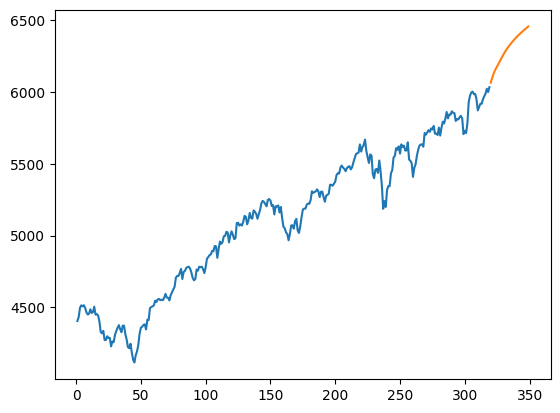

In [78]:
plt.plot(day_new,scaler.inverse_transform(df1[2176:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

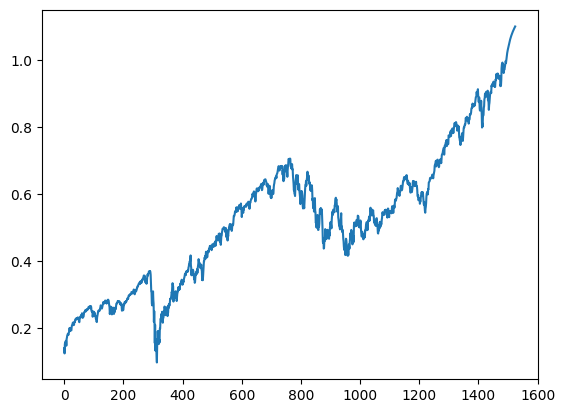

In [79]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [81]:
df3=scaler.inverse_transform(df3).tolist()

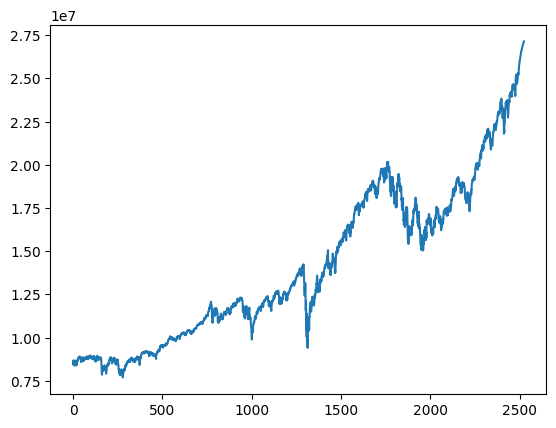

In [82]:
plt.plot(df3)